In [1]:
import sys  
sys.path.insert(0, '/Users/mariamilusheva/code/Fandom_Analyser/src')
sys.path.insert(0, '/Users/mariamilusheva/code/Fandom_Analyser')

import fandom_scraper
import extract_data as ext
from fandom_scraper import Fandom
import json
import pprint
import database_utils as utils
from pathlib import Path
from analysis_tools import FandomAnalysisTools as FAT

In [ ]:
fandom_name = 'Legacy of Kain'
ext.extract_and_process(fandom_name)
# fnd, p = ext.make_fandom_vars(fandom_name)


https://archiveofourown.org/tags/Legacy of Kain/works?page=1
Fandom contains 317 works in 16 pages.
Currently fetching titles page: 1
Currently fetching titles page: 2
Currently fetching titles page: 3
Currently fetching titles page: 4
Currently fetching titles page: 5
Currently fetching titles page: 6
Currently fetching titles page: 7
Currently fetching titles page: 8
Currently fetching titles page: 9
Currently fetching titles page: 10
Currently fetching titles page: 11
Currently fetching titles page: 12
Currently fetching titles page: 13
Currently fetching titles page: 14
Currently fetching titles page: 15
Currently fetching titles page: 16
Scraping freeform tags from fandom page. We do this to ensure all versions of a tag count as the same tag.


In [3]:
ext.extract_works_metadata(fnd, p)

INFO:fandom:Fandom contains 15 works in 1 pages.
INFO:fandom:Currently fetching titles page: 1


15
15


In [11]:
ext.get_chars(fan, fnd, fandom_name)

INFO:fandom:Scraping characters from fandom page. We do this to ensure all versions of a character name count as the same character.
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:fandom:SOCKSHTTPSConnectionPool(host='archiveofourown.org', port=443): Read timed out. (read timeout=30)
INFO:fandom:Oops, we sent too many requests to Ao3! Waiting 60 secs and re-trying...
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0006)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0006)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0002)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0007)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0023)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0006)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0005)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0005)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0005)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0005)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0005)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0107)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:fandom:SOCKSHTTPSConnectionPool(host='archiveofourown.org', port=443): Read timed out. (read timeout=30)
INFO:fandom:Oops, we sent too many requests to Ao3! Waiting 60 secs and re-trying...
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0005)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0007)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0007)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0006)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0005)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0005)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0011)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0005)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0007)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0005)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0005)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0006)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0009)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0021)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0005)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:fandom:SOCKSHTTPSConnectionPool(host='archiveofourown.org', port=443): Max retries exceeded with url: /tags/Sagittarius%20Aiolos (Caused by ConnectTimeoutError(<urllib3.contrib.socks.SOCKSHTTPSConnection object at 0x7f8469aec9d0>, 'Connection to archiveofourown.org timed out. (connect timeout=30)'))
INFO:fandom:Oops, we sent too many requests to Ao3! Waiting 60 secs and re-trying...
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0006)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0002)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0005)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0005)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0005)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0007)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0002)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0007)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0007)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:fandom:SOCKSHTTPSConnectionPool(host='archiveofourown.org', port=443): Max retries exceeded with url: /tags/Shiozaki%20Ibara (Caused by ConnectTimeoutError(<urllib3.contrib.socks.SOCKSHTTPSConnection object at 0x7f8469d299d0>, 'Connection to archiveofourown.org timed out. (connect timeout=30)'))
INFO:fandom:Oops, we sent too many requests to Ao3! Waiting 60 secs and re-trying...
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0002)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0006)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:fandom:Finished getting 117 characters.


In [12]:
ext.get_tags(fan, fnd, fandom_name)

INFO:fandom:Scraping freeform tags from fandom page. We do this to ensure all versions of a tag count as the same tag.
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0005)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0007)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0011)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0008)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0002)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0007)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0025)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0009)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0002)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0005)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0002)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0005)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0006)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0006)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0013)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0002)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0005)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0005)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0012)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0002)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:fandom:SOCKSHTTPSConnectionPool(host='archiveofourown.org', port=443): Max retries exceeded with url: /tags/Also%20him%20being%20inspired%20by%20Francis%20of%20Assissi?%20Excellent (Caused by ConnectTimeoutError(<urllib3.contrib.socks.SOCKSHTTPSConnection object at 0x7f8468661990>, 'Connection to archiveofourown.org timed out. (connect timeout=30)'))
INFO:fandom:Oops, we sent too many requests to Ao3! Waiting 60 secs and re-trying...
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0009)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0006)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0006)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0005)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0008)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0006)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0045)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0007)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0006)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0025)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0033)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0005)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0008)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content


INFO:fandom:SOCKSHTTPSConnectionPool(host='archiveofourown.org', port=443): Max retries exceeded with url: /tags/just%20platonic%20friendship (Caused by SSLError(SSLError("bad handshake: SysCallError(-1, 'Unexpected EOF')")))
INFO:fandom:Oops, we sent too many requests to Ao3! Waiting 60 secs and re-trying...
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0003)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0006)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"


INFO:fandom:Finished getting 135 tags.


In [13]:
ext.get_ships(fan, fnd, fandom_name)

INFO:fandom:Scraping ships from fandom page. We do this to ensure all versions of a ship name count as the same ship.
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0024)
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
INFO:stem:Error while receiving a control message (SocketClosed): empty socket content
DEBUG:stem:GETCONF __owningcontrollerprocess (runtime: 0.0004)
INFO:stem:Error while receiving a control message (SocketClosed): received exception "[Errno 9] Bad file descriptor"
INFO:stem:Error while receiving a control message (SocketClosed): received exception "read of closed file"
DEBUG:stem:GET

In [14]:
ext.process_data_files(fandom_name)

INFO:extract:Processing character names to minimise duplication.
INFO:dedup:Duplicate items found and will be deleted: []
INFO:dedup:Duplicate items found and will be deleted: []
INFO:extract:Processing tag names to minimise duplication.
INFO:dedup:Duplicate items found and will be deleted: []
INFO:extract:Processing relationships to minimise duplication.
INFO:dedup:Duplicate items found and will be deleted: []
INFO:dedup:Duplicate items found and will be deleted: []


In [4]:
with open("/Users/mariamilusheva/code/Fandom_Analyser/fandom_extracted_data/" + fandom_name + "/raw/works.json") as f:
    d = json.load(f)
    ext.process_works_file(d, fandom_name)
    fan.prepare_analytics_folders()

In [5]:
from src.params.folder_params import *

f = open(ROOT_DIR + FILES_ROOT + fandom_name + "/processed/works.json")
d = json.load(f)     

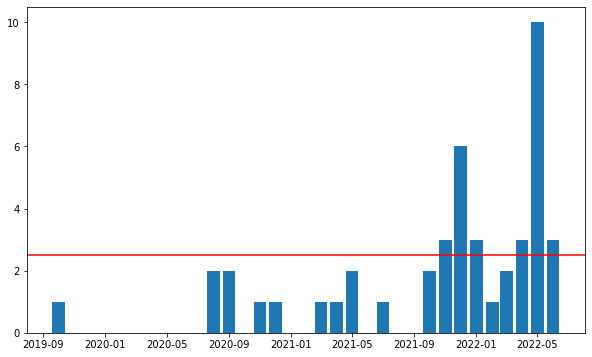

In [17]:
fan.plot_new_works_count_by_month(d)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


ValueError: DateFormatter found a value of x=0, which is an illegal date; this usually occurs because you have not informed the axis that it is plotting dates, e.g., with ax.xaxis_date()

<Figure size 720x432 with 1 Axes>

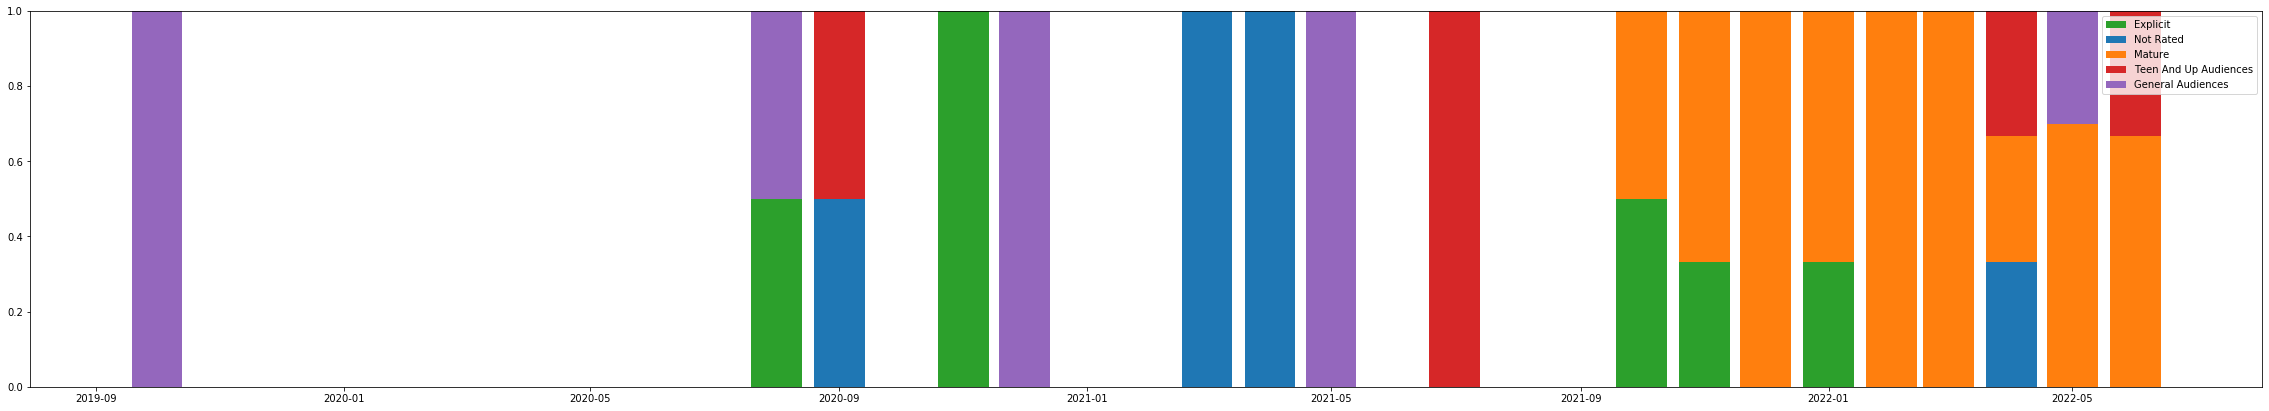

In [18]:
fan.plot_new_works_count_by_month_ratings(d)

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0, flags=flags)


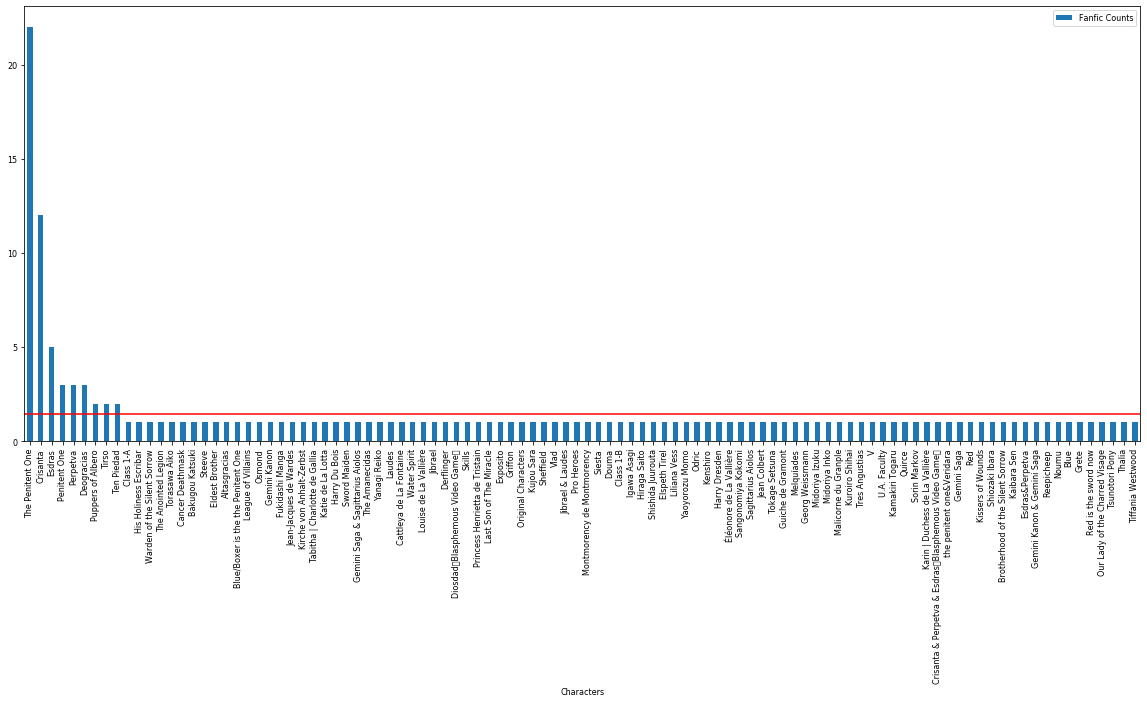

In [19]:
fan.plot_works_count_by_character(d)

IndexError: list index out of range

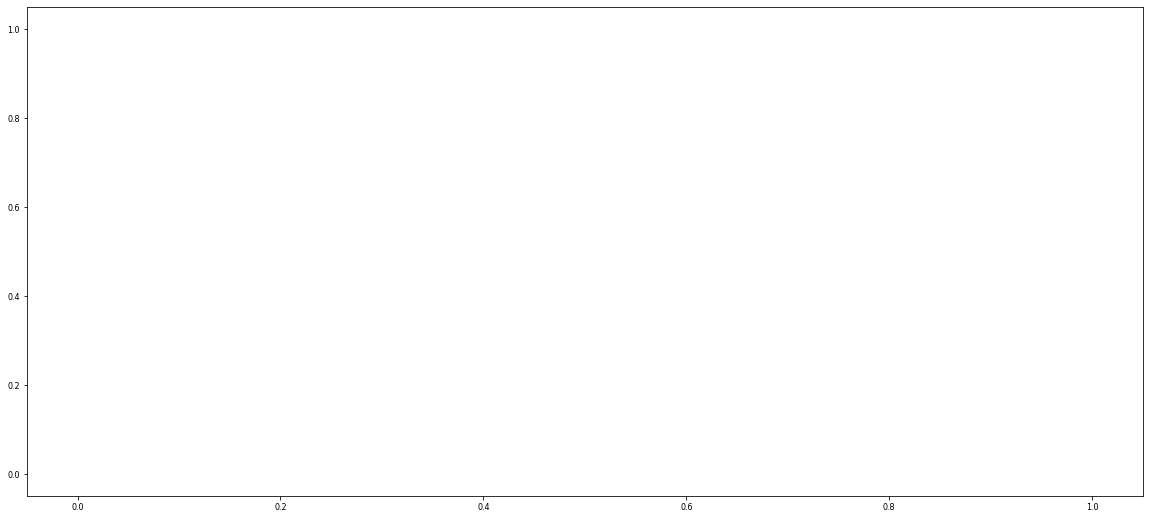

In [20]:
fan.plot_works_count_by_ship(d)

FileNotFoundError: [Errno 2] No such file or directory: 'fandom_extracted_data/Blasphemous (Video Game)/plots/plot_average_hits_character.png'

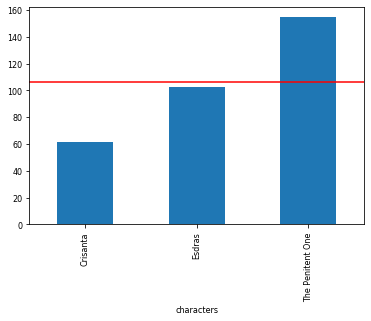

In [22]:
fan.plot_average_hits_character(d)

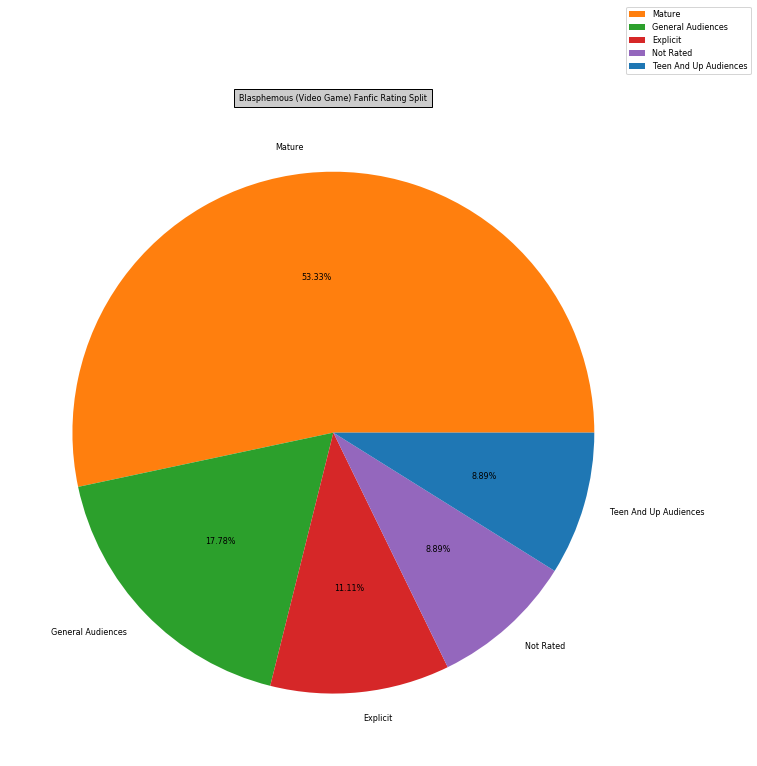

In [23]:
fan.plot_works_count_by_rating(d)

INFO:analysis:Index(['Altasgracias', 'Bakugou Katsuki', 'Blue',
       'Blue/Boxer is the the Penitent One',
       'Brotherhood of the Silent Sorrow', 'Cancer Deathmask',
       'Cattleya de La Fontaine', 'Class 1-A', 'Class 1-B',
       'Crisanta & Perpetva & Esdras（Blasphemous Video Game）', 'Derflinger',
       'Diosdad（Blasphemous Video Game）', 'Douma', 'Eldest Brother',
       'Elspeth Tirel', 'Esdras&Perpetva', 'Exposito', 'Fukidashi Manga',
       'Gemini Kanon', 'Gemini Kanon & Gemini Saga', 'Gemini Saga',
       'Gemini Saga & Sagittarius Aiolos', 'Georg Weissmann', 'Grete',
       'Griffon', 'Guiche de Gramont', 'Harry Dresden', 'Harry Du Bois',
       'Hiraga Saito', 'His Holiness Escribar', 'Igawa Asagi', 'Jean Colbert',
       'Jean-Jacques de Wardes', 'Jibrael', 'Jibrael & Laudes', 'Kaibara Sen',
       'Kamakiri Togaru', 'Karin | Duchess de La Vallière',
       'Katie de La Lotta', 'Kenshiro', 'Kirche von Anhalt-Zerbst',
       'Kissers of Wounds', 'Kujou Sara', 'Kuroiro

FileNotFoundError: [Errno 2] No such file or directory: 'fandom_extracted_data/Blasphemous (Video Game)/plots/plot_chars_rating.png'

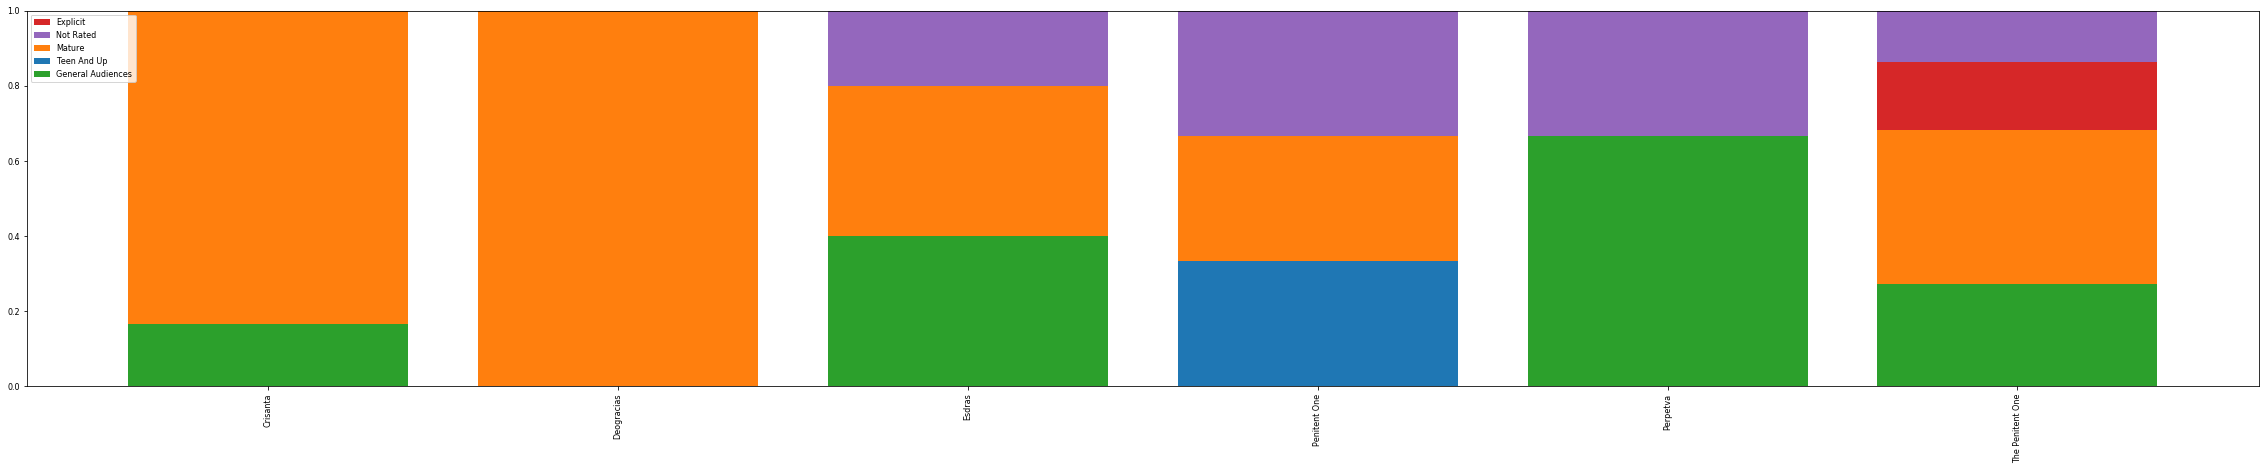

In [24]:
fan.plot_chars_ratings(d)

In [ ]:
fan.plot_works_count_by_tag(d)

In [ ]:
fan.plot_average_words_character(d)

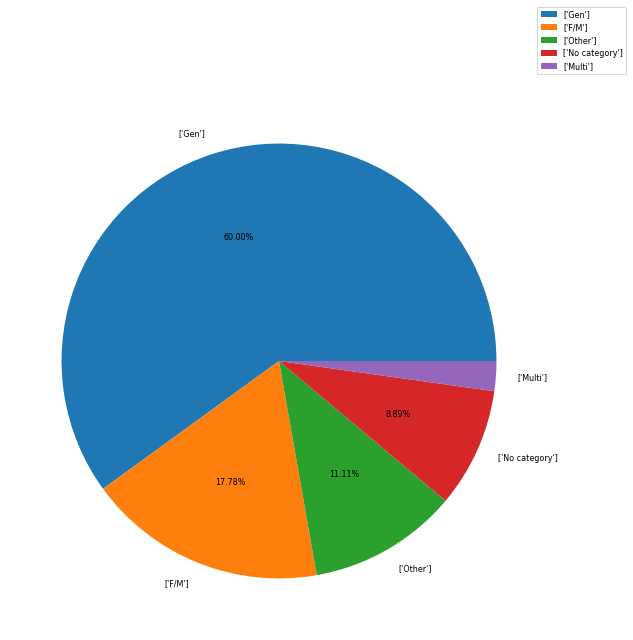

In [25]:
fan.plot_works_count_by_category(d)

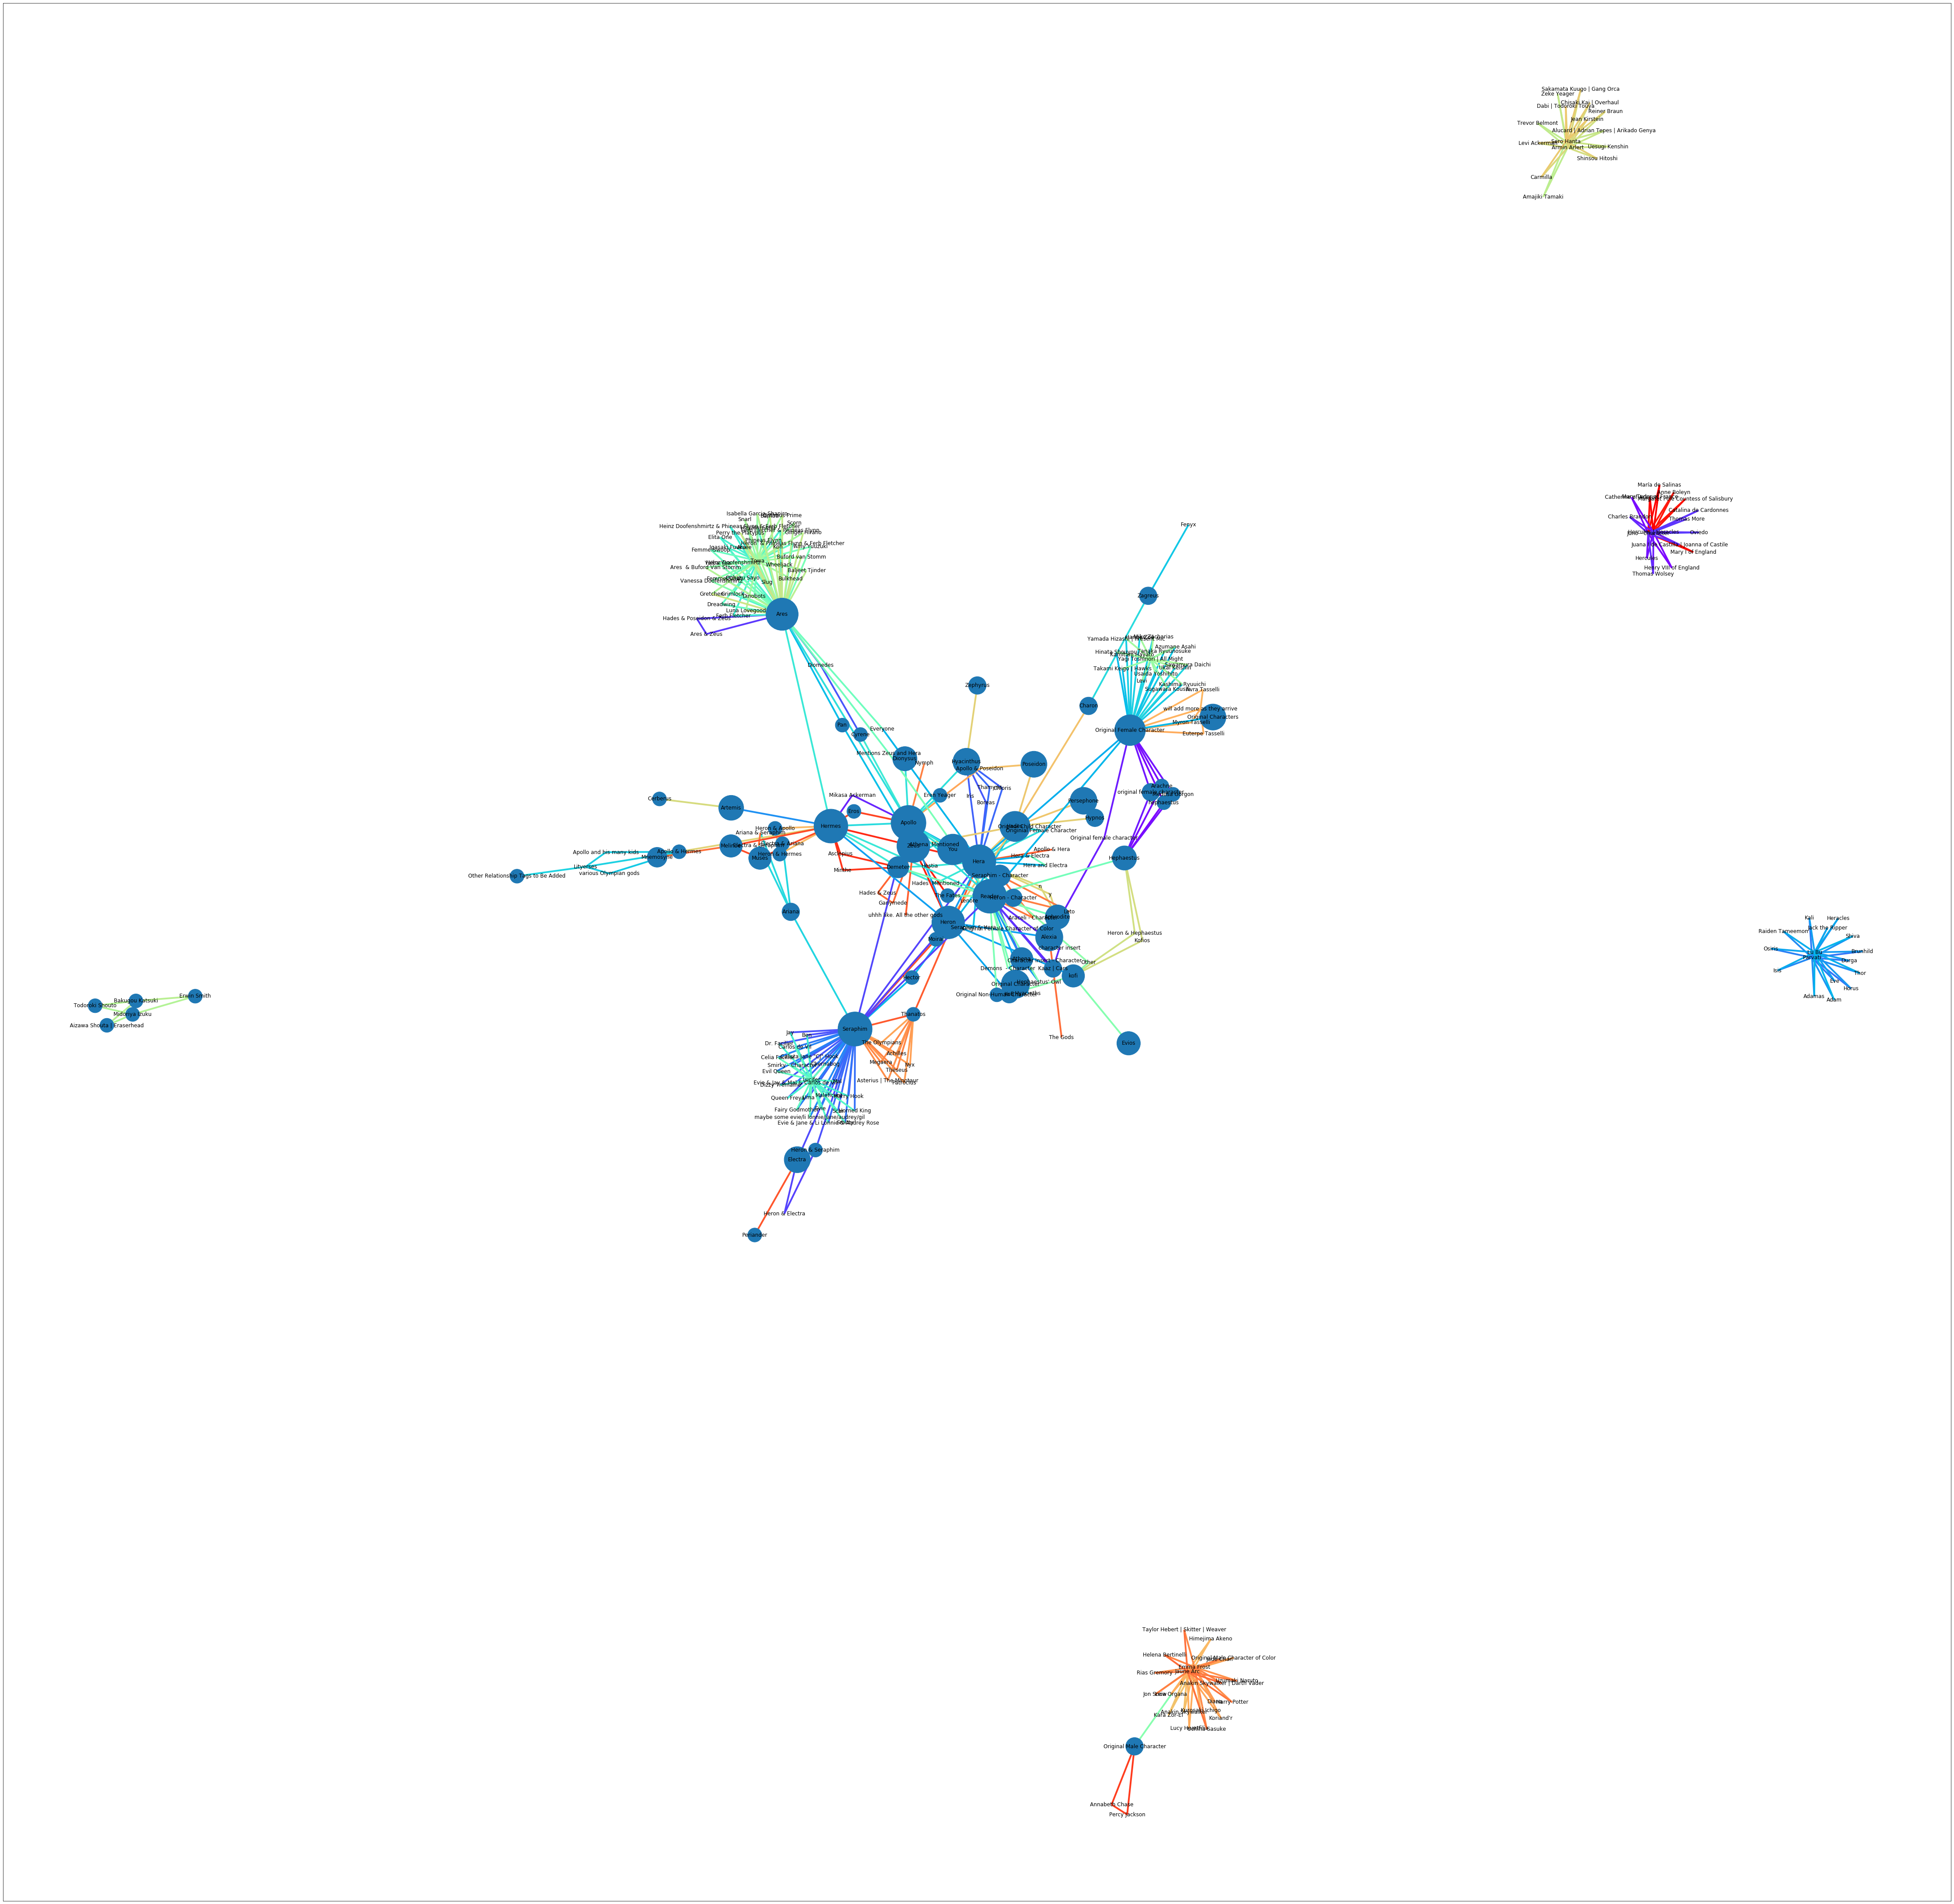

In [6]:
fan.build_rel_dictionary(d)

In [ ]:
# plot_new_char_works_count_by_month(d, "Evelynn")
# author_champ_dedication_score(d, "Qiyana")
# fan.plot_champs_by_dedication_score(d)
# fan.main_character_ratio(d)
# fan.detect_main_characters()
# plot_char_common_appearances(d, 'Vladimir')
# plot_char_tags(d, 'Jhin')
# plot_char_shipping(d, "Fiddlesticks")
# fan.plot_chars_everything(d)
# fan.champs_without_explicit(d)
# plot_average_hits_ships_character(d, 'Evelynn')